## Introduction

## Importing, Cleaning Data, Removing Outliers, EDAs

In [1]:
import pandas as pd
import numpy as np

In [2]:
#importing libraries for graphing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='darkgrid')

In [3]:
#importing csv to dataframe
df = pd.read_csv('data\kc_house_data.csv')

In [4]:
#filling the nan's with 0, all is categorical columns with the mode being 0.0
df['waterfront'] = df['waterfront'].fillna(0.0)
df['view'] = df['view'].fillna(0.0)
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

df.loc[df['sqft_basement'] == '?'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int)

In [5]:
# changing columns from float to int
col_floats = ['price', 'waterfront', 'view', 'yr_renovated']
for col in col_floats:
    df[col] = df[col].astype(int)

In [6]:
#expanding the date column to a column for each month and year
df['date'] = pd.to_datetime(df['date'])
df['month_sold'] = df['date'].dt.month
df['year_sold'] = df['date'].dt.year

In [7]:
#creating seasonal columns
df['sold_spring_time'] = df['month_sold'] < 4
df['sold_summer_time'] = (df['month_sold'] > 3) & (df['month_sold'] < 7)
df['sold_fall_time'] = (df['month_sold'] > 6) & (df['month_sold'] < 10)
df['sold_winter_time'] = (df['month_sold'] > 9) & (df['month_sold'] < 13)

df['sold_spring_time'] = df['sold_spring_time'].astype(bool).astype(int)
df['sold_summer_time'] = df['sold_summer_time'].astype(bool).astype(int)
df['sold_fall_time'] = df['sold_fall_time'].astype(bool).astype(int)
df['sold_winter_time'] = df['sold_winter_time'].astype(bool).astype(int)

In [8]:
#deleting columns not neccesary in dataframe
df.drop('date', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [9]:
#converting 'yr_renovated' into a boolean
df['has_renovated'] = df['yr_renovated'].astype(bool).astype(int)

In [10]:
df.to_csv('data\Cleaned_kc_house_data.csv')

In [11]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,month_sold,year_sold,sold_spring_time,sold_summer_time,sold_fall_time,sold_winter_time,has_renovated
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,...,-122.257,1340,5650,10,2014,0,0,0,1,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,...,-122.319,1690,7639,12,2014,0,0,0,1,1
2,180000,2,1.00,770,10000,1.0,0,0,3,6,...,-122.233,2720,8062,2,2015,1,0,0,0,0
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,...,-122.393,1360,5000,12,2014,0,0,0,1,0
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,...,-122.045,1800,7503,2,2015,1,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21597 non-null  int32  
 1   bedrooms          21597 non-null  int64  
 2   bathrooms         21597 non-null  float64
 3   sqft_living       21597 non-null  int64  
 4   sqft_lot          21597 non-null  int64  
 5   floors            21597 non-null  float64
 6   waterfront        21597 non-null  int32  
 7   view              21597 non-null  int32  
 8   condition         21597 non-null  int64  
 9   grade             21597 non-null  int64  
 10  sqft_above        21597 non-null  int64  
 11  sqft_basement     21597 non-null  int32  
 12  yr_built          21597 non-null  int64  
 13  yr_renovated      21597 non-null  int32  
 14  zipcode           21597 non-null  int64  
 15  lat               21597 non-null  float64
 16  long              21597 non-null  float6

Above chart are showing some highly correlated continuous columns. We'll be dropping 'long' and 'lat' column by using 'zipcode' instead. Also dropping 'sqft_above', 'sqft_living15', and 'sqft_lot15' due to high correlation that will lead to fallacy in our model.

### price

In [13]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,month_sold,year_sold,sold_spring_time,sold_summer_time,sold_fall_time,sold_winter_time,has_renovated
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.291484e+05,3.301662,2.071596,2037.176784,1.476998e+04,1.462194,0.006575,0.227763,3.338241,7.497291,...,-119.644765,1945.496087,12471.151086,6.457471,2013.391675,0.206788,0.309441,0.267954,0.215817,0.033477
std,3.723490e+05,1.035168,0.818766,956.614171,4.083115e+04,0.574968,0.080821,0.756727,0.808427,1.599035,...,17.533235,735.892458,26944.222849,3.184560,6.375417,0.405011,0.462274,0.442904,0.411397,0.179882
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,-122.519000,0.000000,0.000000,1.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.150000e+05,3.000000,1.500000,1396.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,-122.326000,1460.000000,5000.000000,4.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.450000e+05,3.000000,2.250000,1890.000000,7.532000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,-122.224000,1820.000000,7560.000000,6.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.380000e+05,4.000000,2.500000,2530.000000,1.053000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,-122.117000,2350.000000,10009.000000,9.000000,2015.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,0.000000,6210.000000,871200.000000,12.000000,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
#taking a look at price
df['price'].describe()

count    2.159700e+04
mean     5.291484e+05
std      3.723490e+05
min      0.000000e+00
25%      3.150000e+05
50%      4.450000e+05
75%      6.380000e+05
max      7.700000e+06
Name: price, dtype: float64

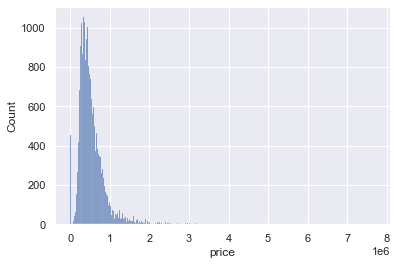

In [15]:
#using graphs to look for potential outliers
sns.histplot(data=df, x='price');

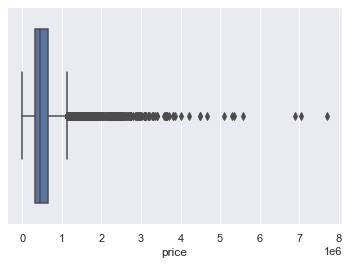

In [16]:
sns.boxplot(data=df, x='price');

In [17]:
#Making the 'price' benchmark between $100000 to $900000
df.drop(df[df['price'] > 900000].index, inplace = True)
df.drop(df[df['price'] < 100000].index, inplace = True)

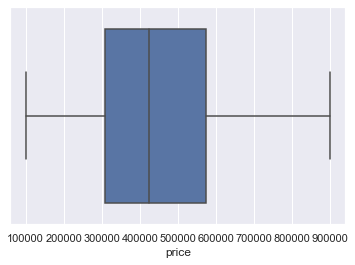

In [18]:
#checking the graphs again to see the changes we made
sns.boxplot(data=df, x='price');

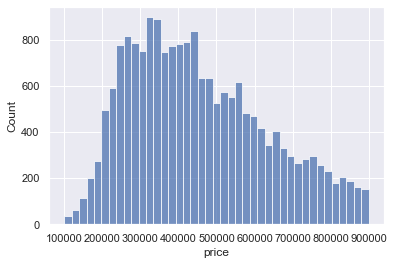

In [19]:
#The histogram looks to be more normally distributed after removing outliers
sns.histplot(data=df, x='price');

In [20]:
#checking the rows left
df.shape

(19124, 26)

### bedrooms

In [21]:
df['bedrooms'].value_counts()

3     9179
4     5729
2     2631
5     1161
6      198
1      185
7       25
8        9
9        3
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [22]:
df.drop(df[df['bedrooms'] > 6].index, inplace = True)

In [23]:
df['bedrooms'].value_counts()

3    9179
4    5729
2    2631
5    1161
6     198
1     185
Name: bedrooms, dtype: int64

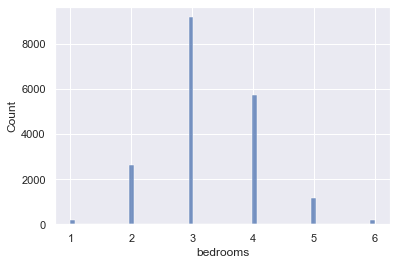

In [24]:
sns.histplot(data = df, x='bedrooms');

In [25]:
df.shape

(19083, 26)

### bathrooms

In [26]:
df['bathrooms'].value_counts()

2.50    4849
1.00    3715
1.75    2912
2.25    1844
2.00    1839
1.50    1385
2.75     980
3.00     578
3.50     434
3.25     324
0.75      69
3.75      50
4.00      43
4.50      23
4.25      18
1.25       7
5.00       5
0.50       3
4.75       2
5.25       2
6.00       1
Name: bathrooms, dtype: int64

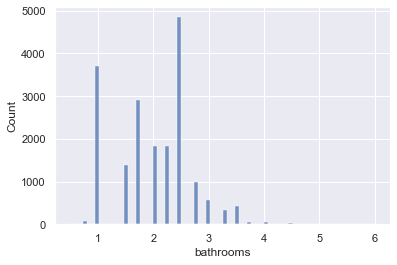

In [27]:
sns.histplot(data=df, x = 'bathrooms');

In [28]:
df.drop(df[df['bathrooms'] > 4].index, inplace = True)
df.drop(df[df['bathrooms'] < 0.75].index, inplace = True)

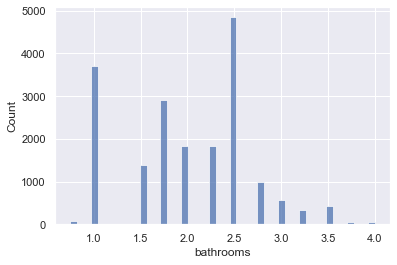

In [29]:
sns.histplot(data=df, x = 'bathrooms');

In [30]:
df.shape

(19029, 26)

### sqft_living

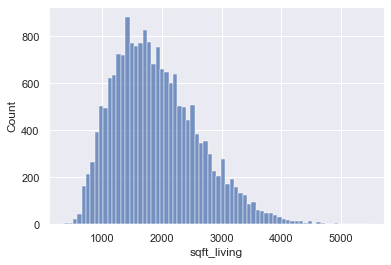

In [31]:
sns.histplot(data=df, x = 'sqft_living');

In [32]:
df['sqft_living'].describe()

count    19029.000000
mean      1915.710600
std        715.155835
min        370.000000
25%       1380.000000
50%       1820.000000
75%       2360.000000
max       5461.000000
Name: sqft_living, dtype: float64

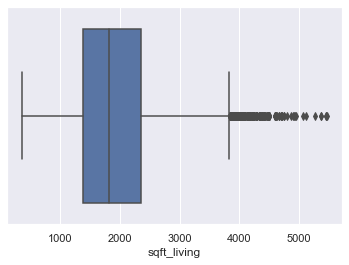

In [33]:
sns.boxplot(data = df, x='sqft_living');

In [34]:
df.drop(df[df['sqft_living'] > 4500].index, inplace = True)

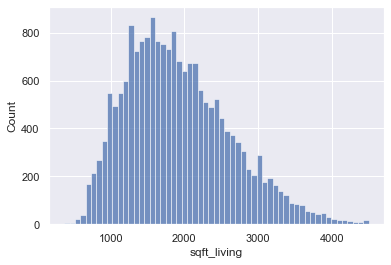

In [35]:
sns.histplot(data=df, x = 'sqft_living');

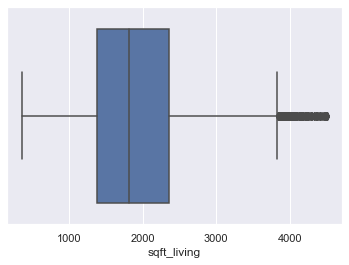

In [36]:
sns.boxplot(data = df, x='sqft_living');

In [37]:
df.shape

(19000, 26)

### sqft_lot

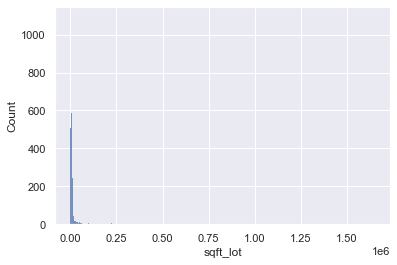

In [38]:
sns.histplot(data=df, x='sqft_lot');

In [39]:
df['sqft_lot'].describe()

count    1.900000e+04
mean     1.416697e+04
std      3.854211e+04
min      5.200000e+02
25%      5.000000e+03
50%      7.490500e+03
75%      1.016000e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [40]:
df.drop(df[df['sqft_lot'] > 25000].index, inplace = True)

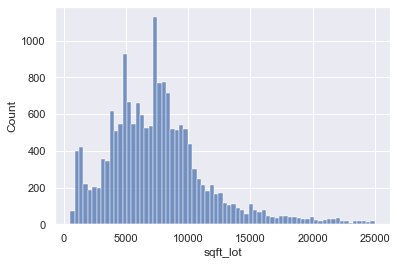

In [41]:
sns.histplot(data=df, x='sqft_lot');

In [42]:
df.shape

(17472, 26)

### sqft_basement

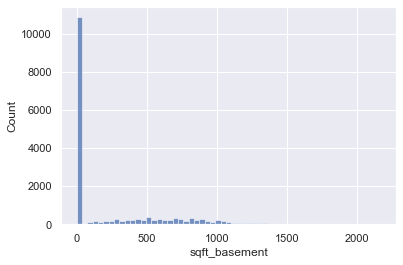

In [43]:
sns.histplot(data=df, x='sqft_basement');

In [44]:
df['sqft_basement'].value_counts()

0       10854
500       188
600       188
700       181
800       165
        ...  
666         1
906         1
1930        1
2170        1
1135        1
Name: sqft_basement, Length: 233, dtype: int64

In [45]:
df['sqft_basement'].describe()

count    17472.000000
mean       253.097184
std        385.174323
min          0.000000
25%          0.000000
50%          0.000000
75%        500.000000
max       2170.000000
Name: sqft_basement, dtype: float64

In [46]:
df.drop(df[df['sqft_basement'] > 1300].index, inplace=True)

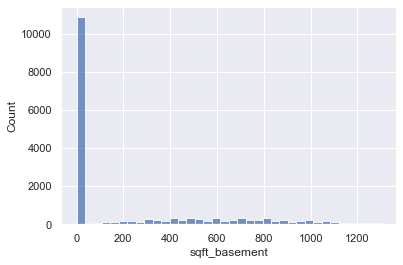

In [47]:
sns.histplot(data = df, x='sqft_basement');

In [48]:
df.shape

(17216, 26)

### floors

In [49]:
df['floors'].value_counts()

1.0    9010
2.0    6066
1.5    1524
3.0     525
2.5      85
3.5       6
Name: floors, dtype: int64

In [50]:
df.drop(df[df['floors'] > 3].index, inplace=True)

In [51]:
df['floors'].value_counts()

1.0    9010
2.0    6066
1.5    1524
3.0     525
2.5      85
Name: floors, dtype: int64

### grade and condition

In [52]:
df['grade'].value_counts()

7     8207
8     4968
6     1865
9     1570
10     363
5      190
11      28
4       18
3        1
Name: grade, dtype: int64

In [53]:
df['condition'].value_counts()

3    11256
4     4500
5     1303
2      132
1       19
Name: condition, dtype: int64

### sqft_lot15

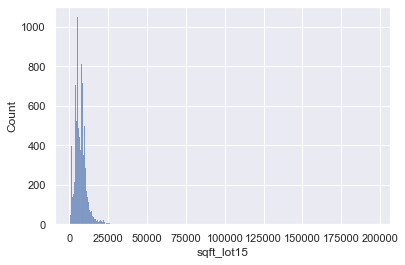

In [54]:
sns.histplot(data = df, x = 'sqft_lot15');

In [55]:
df.drop(df[df['sqft_lot15'] > 25000].index, inplace=True)

<AxesSubplot:xlabel='sqft_lot15', ylabel='Count'>

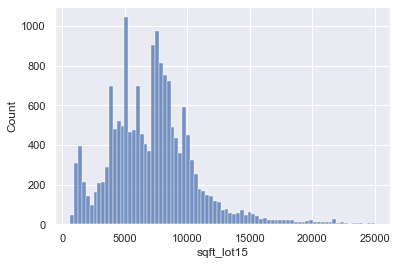

In [56]:
sns.histplot(data = df, x = 'sqft_lot15')

In [57]:
df.shape

(17110, 26)

### sqft_living15

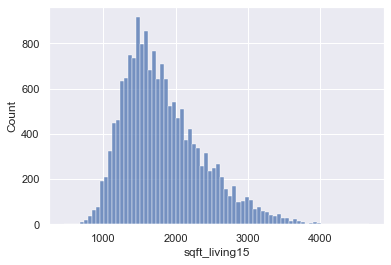

In [58]:
sns.histplot(data = df, x = 'sqft_living15');

## Multi-collineary 

In [59]:
df_cont = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
df_cont.corr()
data_cont = df_cont.corr().abs().stack().reset_index().sort_values(0, ascending=False)
data_cont['pairs'] = list(zip(data_cont.level_0, data_cont.level_1))
data_cont.set_index(['pairs'], inplace=True)
data_cont.drop(columns=['level_1', 'level_0'], inplace = True)
data_cont.columns = ['cc']
data_cont.drop_duplicates(inplace=True)
data_cont[(data_cont.cc>.70) & (data_cont.cc<1)]

,cc
pairs,
"(sqft_lot, sqft_lot15)",0.857785
"(sqft_above, sqft_living)",0.851931
"(sqft_living, sqft_living15)",0.735705
"(sqft_living15, sqft_above)",0.714953


In [60]:
df_cont.corr()

,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
sqft_living,1.000000,0.202818,0.851931,0.309181,-0.023523,0.288471,0.735705,0.183068
sqft_lot,0.202818,1.000000,0.170822,0.066276,-0.138709,0.241378,0.240405,0.857785
sqft_above,0.851931,0.170822,1.000000,-0.234596,-0.089690,0.399040,0.714953,0.154875
sqft_basement,0.309181,0.066276,-0.234596,1.000000,0.119219,-0.189185,0.067317,0.058573
lat,-0.023523,-0.138709,-0.089690,0.119219,1.000000,-0.152922,-0.017143,-0.139801
long,0.288471,0.241378,0.399040,-0.189185,-0.152922,1.000000,0.367966,0.251962
sqft_living15,0.735705,0.240405,0.714953,0.067317,-0.017143,0.367966,1.000000,0.256299
sqft_lot15,0.183068,0.857785,0.154875,0.058573,-0.139801,0.251962,0.256299,1.000000


>Above chart are showing some highly correlated continuous columns. We'll be dropping 'sqft_above', 'sqft_living15', and 'sqft_lot15' due to high correlation that will lead to fallacy in our model.

In [61]:
#Updating the df_cont
df_cont.drop('sqft_above', axis = 1, inplace = True)
df_cont.drop('sqft_living15', axis = 1, inplace = True)
df_cont.drop('sqft_lot15', axis = 1, inplace = True)

C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [62]:
df_cont.columns

Index(['sqft_living', 'sqft_lot', 'sqft_basement', 'lat', 'long'], dtype='object')

> We are dropping 'lat' and 'long' columns because we'll be using zipcode instead. As well as dropping the 'view' columns because we believe it's not a big determining factor for house prices.

In [63]:
df_cont.drop('long', axis = 1, inplace = True)
df_cont.drop('lat', axis = 1, inplace = True)

## Categorical / One Hot Encoded

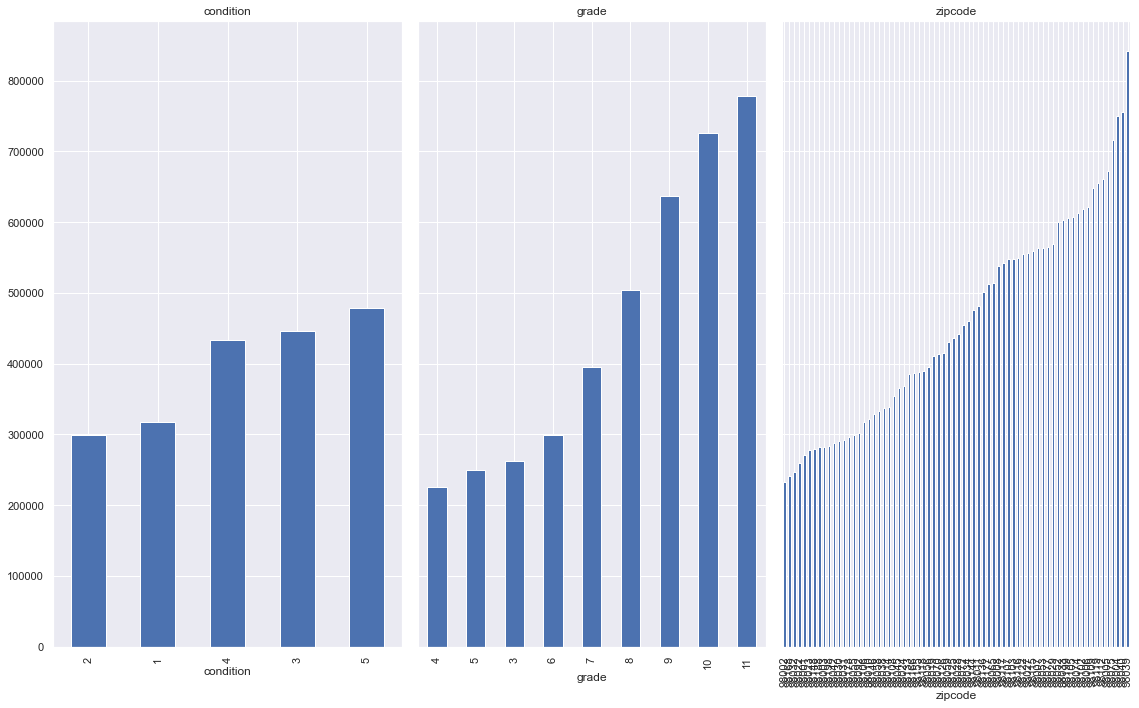

In [64]:
#looking at graphs to see columns shaped like a categorical data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,10), sharey=True)

feats = ['condition', 'grade', 'zipcode']

for col, ax in zip(feats, axes.flatten()):
    (df.groupby(col)               
         .mean()['price']        
         .sort_values()              
         .plot
         .bar(ax=ax))                
    
    ax.set_title(col)                
fig.tight_layout()

In [65]:
features = df[feats].astype('category')

In [66]:
feats_ohe = pd.get_dummies(features, drop_first = True)

In [67]:
feats_ohe = feats_ohe.astype(int)

In [68]:
feats_ohe.head()

,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Baseline DataFrame

In [69]:
#creating seperate dataframe from the original to make changes
df_b = df

>Dropping 'lat', 'long', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'view', and 'yr_renovated'

In [70]:
#dropping the multicollinearies and unwanted columns first
df_b.drop('lat', axis = 1, inplace = True)
df_b.drop('long', axis = 1, inplace = True)
df_b.drop('sqft_above', axis = 1, inplace = True)
df_b.drop('sqft_living15', axis = 1, inplace = True)
df_b.drop('sqft_lot15', axis = 1, inplace = True)
df_b.drop('view', axis = 1, inplace = True)
df_b.drop('yr_renovated', axis = 1, inplace = True)

>Dropping 'condition', 'grade', and 'zipcode' since they're replaced with one hot encoded features

In [71]:
df_b.drop('condition', axis = 1, inplace = True)
df_b.drop('grade', axis = 1, inplace = True)
df_b.drop('zipcode', axis = 1, inplace = True)

In [72]:
#looking at the columns function to make sure they have been removed
df_b.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'sqft_basement', 'yr_built', 'month_sold', 'year_sold',
       'sold_spring_time', 'sold_summer_time', 'sold_fall_time',
       'sold_winter_time', 'has_renovated'],
      dtype='object')

> Adding the new features to the baseline data

In [73]:
df_b = pd.concat([df_b, feats_ohe], axis = 1)

In [74]:
#checking to see the new dataset and ensuring that there is no missing values
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17110 entries, 0 to 21596
Data columns (total 97 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             17110 non-null  int32  
 1   bedrooms          17110 non-null  int64  
 2   bathrooms         17110 non-null  float64
 3   sqft_living       17110 non-null  int64  
 4   sqft_lot          17110 non-null  int64  
 5   floors            17110 non-null  float64
 6   waterfront        17110 non-null  int32  
 7   sqft_basement     17110 non-null  int32  
 8   yr_built          17110 non-null  int64  
 9   month_sold        17110 non-null  int64  
 10  year_sold         17110 non-null  int64  
 11  sold_spring_time  17110 non-null  int32  
 12  sold_summer_time  17110 non-null  int32  
 13  sold_fall_time    17110 non-null  int32  
 14  sold_winter_time  17110 non-null  int32  
 15  has_renovated     17110 non-null  int32  
 16  condition_2       17110 non-null  int32 

## Train-Test Split

In [75]:
#importing the necessary libraries for train-test split
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [76]:
y = df_b[['price']]
X = df_b.drop(['price'], axis=1)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = (123))

In [78]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

13688 3422 13688 3422


In [79]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

Looking at the residuals and finding the MSE for training and test sets

In [80]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [81]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    5.479582e+09
dtype: float64
Test Mean Squarred Error: price    5.455148e+09
dtype: float64


In [82]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 5479581788.236872
Test Mean Squarred Error: 5455147860.203289


## Fitting Baseline Model

In [83]:
from statsmodels.formula.api import ols

In [84]:
outcome = 'price'
dftrain = pd.concat([X_train, y_train], axis = 1)

In [85]:
# Fitting the actual model
predictors = '+'.join(X.columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     676.8
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:33:41   Log-Likelihood:            -1.7289e+05
No. Observations:               13688   AIC:                         3.460e+05
Df Residuals:                   13592   BIC:                         3.467e+05
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.304e+07   4.19e+06    -12.667      0.000   -6.12e+07   -4.48e+07
bedrooms         -3123.9499   1018.856     -3.066      0.002   -5121.049   -1126.850
bathrooms         1.474e+04   1664.506      8.857      0.000    1.15e+04     1.8e+04
sqft_living        119.1967      2.011     59.283      0.000     115.256     123.138
sqft_lot             1.4897      0.224      6.645      0.000       1.050       1.929
floors           -1.637e+04   1964.834     -8.330      0.000   -2.02e+04   -1.25e+04
waterfront        3.123e+05    1.7e+04     18.339      0.000    2.79e+05    3.46e+05
sqft_basement      -35.7040      2.520    -14.167      0.000     -40.644     -30.764
yr_built          -491.0524     39.361    -12.476      0.000    -568.205    -413.899
month_sold        2757.0572    873.654      3.156      0.002    1044.575    4469.540
year_sold          3.34e+04   2596.096     12.865      0.000    2.83e+04    3.85e+04
sold_spring_time -1.326e+07   1.05e+06    -12.669      0.000   -1.53e+07   -1.12e+07
sold_summer_time -1.325e+07   1.05e+06    -12.663      0.000   -1.53e+07   -1.12e+07
sold_fall_time   -1.326e+07   1.05e+06    -12.670      0.000   -1.53e+07   -1.12e+07
sold_winter_time -1.327e+07   1.05e+06    -12.665      0.000   -1.53e+07   -1.12e+07
has_renovated     2.854e+04   4139.915      6.893      0.000    2.04e+04    3.67e+04
condition_2       3.095e+04   1.96e+04      1.582      0.114   -7402.263    6.93e+04
condition_3       7.132e+04   1.83e+04      3.903      0.000    3.55e+04    1.07e+05
condition_4       8.929e+04   1.83e+04      4.883      0.000    5.34e+04    1.25e+05
condition_5        1.18e+05   1.84e+04      6.417      0.000     8.2e+04    1.54e+05
grade_4          -1.031e+05   7.75e+04     -1.330      0.183   -2.55e+05    4.88e+04
grade_5          -1.229e+05   7.49e+04     -1.641      0.101    -2.7e+05    2.39e+04
grade_6          -1.111e+05   7.47e+04     -1.488      0.137   -2.57e+05    3.53e+04
grade_7          -7.835e+04   7.47e+04     -1.049      0.294   -2.25e+05     6.8e+04
grade_8          -3.141e+04   7.47e+04     -0.420      0.674   -1.78e+05    1.15e+05
grade_9           3.445e+04   7.48e+04      0.461      0.645   -1.12e+05    1.81e+05
grade_10          5.742e+04   7.49e+04      0.766      0.443   -8.94e+04    2.04e+05
grade_11          1.017e+05   7.67e+04      1.325      0.185   -4.87e+04    2.52e+05
zipcode_98002     5132.4481   7732.027      0.664      0.507      -1e+04    2.03e+04
zipcode_98003     6774.7572   7072.119      0.958      0.338   -7087.576    2.06e+04
zipcode_98004     4.689e+05   9601.882     48.832      0.000     4.5e+05    4.88e+05
zipcode_98005     3.224e+05   9764.323     33.013      0.000    3.03e+05    3.41e+05
zipcode_98006     2.671e+05   6883.047     38.807      0.000    2.54e+05    2.81e+05
zipcode_98007     2.456

R-squared: 0.826

Adj R-squared: 0.825

Number of significant p_values: 13

### Checking QQ Plot

In [86]:
import statsmodels.api as sm

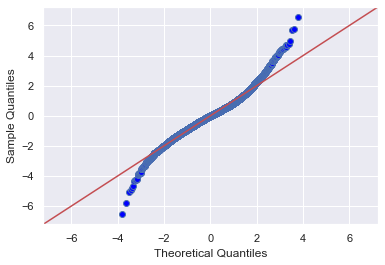

In [87]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Checking for Homoscedasticity

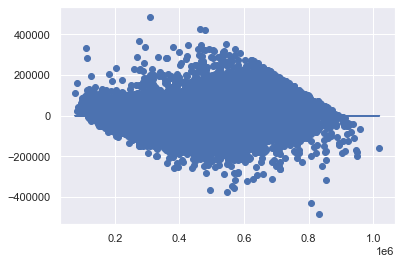

In [88]:
plt.scatter(model.predict(dftrain[X.columns]), model.resid)
plt.plot(model.predict(dftrain[X.columns]), [0 for i in range(len(dftrain))])

## Second Model - Multicollinearies

In [89]:
#Importing variance inflation factor to check for multicollinearies 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
col = df_b[X.columns]
vif = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]
list(zip(X.columns, vif))

[('bedrooms', 1.8269710431048878),
 ('bathrooms', 3.0954045275084896),
 ('sqft_living', 4.364474866383063),
 ('sqft_lot', 1.8895944628835357),
 ('floors', 2.8087862514735558),
 ('waterfront', 1.0428789846551867),
 ('sqft_basement', 2.0120282061685577),
 ('yr_built', 3.3964791973157866),
 ('month_sold', 18.636002233625078),
 ('year_sold', 3.654247222156054),
 ('sold_spring_time', 13031012.018292781),
 ('sold_summer_time', 21036333.883923292),
 ('sold_fall_time', 18604921.50891311),
 ('sold_winter_time', 14993527.33196976),
 ('has_renovated', 1.1089738857587865),
 ('condition_2', 7.829225699190105),
 ('condition_3', 208.37955767353003),
 ('condition_4', 177.89793352055437),
 ('condition_5', 65.2531774465086),
 ('grade_4', 19.13610091844117),
 ('grade_5', 187.44808388648826),
 ('grade_6', 1666.7620797130292),
 ('grade_7', 4306.5394487201265),
 ('grade_8', 3550.108732413433),
 ('grade_9', 1428.3790959971113),
 ('grade_10', 356.38093749097374),
 ('grade_11', 29.31474361706567),
 ('zipcode_9

In [91]:
vif_scores = list(zip(X.columns, vif))
v_test = [x for x, vif in vif_scores if vif > 10]
print(len(vif_scores), len(v_test))

96 16


In [92]:
v_test

['month_sold',
 'sold_spring_time',
 'sold_summer_time',
 'sold_fall_time',
 'sold_winter_time',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11']

In [93]:
for v in v_test:
    dftrain.drop(v, axis=1, inplace=True)

In [94]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13688 entries, 231 to 19930
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       13688 non-null  int64  
 1   bathrooms      13688 non-null  float64
 2   sqft_living    13688 non-null  int64  
 3   sqft_lot       13688 non-null  int64  
 4   floors         13688 non-null  float64
 5   waterfront     13688 non-null  int32  
 6   sqft_basement  13688 non-null  int32  
 7   yr_built       13688 non-null  int64  
 8   year_sold      13688 non-null  int64  
 9   has_renovated  13688 non-null  int32  
 10  condition_2    13688 non-null  int32  
 11  zipcode_98002  13688 non-null  int32  
 12  zipcode_98003  13688 non-null  int32  
 13  zipcode_98004  13688 non-null  int32  
 14  zipcode_98005  13688 non-null  int32  
 15  zipcode_98006  13688 non-null  int32  
 16  zipcode_98007  13688 non-null  int32  
 17  zipcode_98008  13688 non-null  int32  
 18  zipc

In [102]:
updf_b = dftrain.drop(['price'], axis=1)
predictors = '+'.join(updf_b.columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     673.2
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:38:12   Log-Likelihood:            -1.7389e+05
No. Observations:               13688   AIC:                         3.479e+05
Df Residuals:                   13607   BIC:                         3.485e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.938e+07   2.94e+06    -13.374      0.000   -4.51e+07   -3.36e+07
bedrooms      -8985.3182   1072.493     -8.378      0.000   -1.11e+04   -6883.084
bathrooms      2.064e+04   1765.049     11.694      0.000    1.72e+04    2.41e+04
sqft_living     157.8472      1.865     84.638      0.000     154.192     161.503
sqft_lot          2.2170      0.239      9.286      0.000       1.749       2.685
floors        -1.462e+04   2099.968     -6.963      0.000   -1.87e+04   -1.05e+04
waterfront     3.165e+05   1.83e+04     17.334      0.000    2.81e+05    3.52e+05
sqft_basement   -51.8369      2.628    -19.728      0.000     -56.987     -46.686
yr_built       -263.2073     37.797     -6.964      0.000    -337.294    -189.120
year_sold      1.979e+04   1461.427     13.544      0.000    1.69e+04    2.27e+04
has_renovated  2.175e+04   4390.724      4.954      0.000    1.31e+04    3.04e+04
condition_2   -5.833e+04   7848.088     -7.432      0.000   -7.37e+04   -4.29e+04
zipcode_98002  4692.5654   8284.515      0.566      0.571   -1.15e+04    2.09e+04
zipcode_98003  1.814e+04   7580.341      2.393      0.017    3282.943     3.3e+04
zipcode_98004  4.957e+05   1.03e+04     48.226      0.000    4.76e+05    5.16e+05
zipcode_98005  3.584e+05   1.04e+04     34.329      0.000    3.38e+05    3.79e+05
zipcode_98006  3.095e+05   7311.544     42.324      0.000    2.95e+05    3.24e+05
zipcode_98007   2.76e+05   9784.153     28.210      0.000    2.57e+05    2.95e+05
zipcode_98008  2.654e+05   7538.349     35.209      0.000    2.51e+05     2.8e+05
zipcode_98010  7.017e+04   1.39e+04      5.056      0.000     4.3e+04    9.74e+04
zipcode_98011  1.637e+05   8223.369     19.905      0.000    1.48e+05     1.8e+05
zipcode_98014  8.639e+04   1.23e+04      7.041      0.000    6.23e+04     1.1e+05
zipcode_98019  9.627e+04   8775.512     10.971      0.000    7.91e+04    1.13e+05
zipcode_98022  1.385e+04   8777.204      1.578      0.115   -3354.769    3.11e+04
zipcode_98023  -366.0233   6466.122     -0.057      0.955    -1.3e+04    1.23e+04
zipcode_98024  1.241e+05    1.9e+04      6.535      0.000    8.69e+04    1.61e+05
zipcode_98027  2.545e+05   7653.185     33.253      0.000    2.39e+05    2.69e+05
zipcode_98028  1.475e+05   7615.221     19.366      0.000    1.33e+05    1.62e+05
zipcode_98029  2.655e+05   7405.085     35.854      0.000    2.51e+05     2.8e+05
zipcode_98030  1.216e+04   7700.150      1.579      0.114   -2931.945    2.73e+04
zipcode_98031  2.267e+04   7593.461      2.986      0.003    7790.570    3.76e+04
zipcode_98032  1.512e+04   9554.400      1.583      0.114   -3606.113    3.38e+04
zipcode_98033  3.272e+05   7120.746     45.953      0.000    3.13e+05    3.41e+05
zipcode_98034  1.978e+05   6412.978     30.845      0.000    1.85e+05     2.1e+05
zipcode_98038   4.06e+04   6414.326      6.329   

### QQ Plot

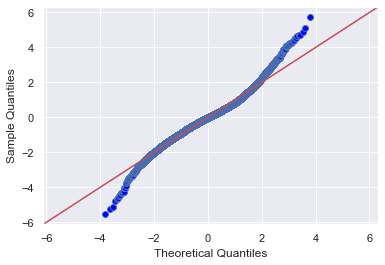

In [103]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Homoscedasticity

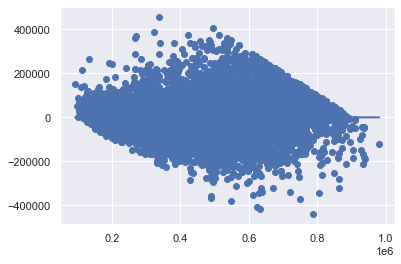

In [105]:
plt.scatter(model.predict(dftrain[updf_b.columns]), model.resid)
plt.plot(model.predict(dftrain[updf_b.columns]), [0 for i in range(len(dftrain))])

## Third Model - P_Values

In [106]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

81 74
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-3.938e+07,2.94e+06,-13.374,0.0,-4.51e+07,-3.36e+07
bedrooms,-8985.3182,1072.493,-8.378,0.0,-1.11e+04,-6883.084
bathrooms,2.064e+04,1765.049,11.694,0.0,1.72e+04,2.41e+04
sqft_living,157.8472,1.865,84.638,0.0,154.192,161.503
sqft_lot,2.2170,0.239,9.286,0.0,1.749,2.685
